In [0]:
import pandas as pd

In [110]:
# Doc du lieu
dt = pd.read_csv('/content/housepricedata.csv')
dt

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [111]:
# Convert dataframe sang mảng, sử dụng 'values', mục đích để truyền vào mạng nơ ron
# Du doan gia nha cao hon hay thap hon gia tri trung binh cac gia nha da co
dataset = dt.values
len(dataset)

1460

In [112]:
X = dataset[:, :10]
Y = dataset[:, 10]
Y

array([1, 1, 1, ..., 1, 0, 0])

In [0]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [114]:
# Chia ti le nho hon cua du lieu, dua du lieu vao torng mot range xac dinh va chia ti le
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [0]:
# Chia du lieu train, validate, test
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_scale, Y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow import keras

In [117]:
# mang noron co 3 lop, 2 lop an 32 node, dau ra 1 node voi ham sigmoid
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [0]:
#
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [119]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 934 samples, validate on 234 samples
Epoch 1/100
934/934 [==============================] - 0s 109us/step - loss: 0.6946 - accuracy: 0.5332 - val_loss: 0.6896 - val_accuracy: 0.5342
Epoch 2/100
934/934 [==============================] - 0s 39us/step - loss: 0.6909 - accuracy: 0.5375 - val_loss: 0.6853 - val_accuracy: 0.5556
Epoch 3/100
934/934 [==============================] - 0s 40us/step - loss: 0.6870 - accuracy: 0.5493 - val_loss: 0.6813 - val_accuracy: 0.5897
Epoch 4/100
934/934 [==============================] - 0s 40us/step - loss: 0.6835 - accuracy: 0.5653 - val_loss: 0.6771 - val_accuracy: 0.5855
Epoch 5/100
934/934 [==============================] - 0s 42us/step - loss: 0.6797 - accuracy: 0.5589 - val_loss: 0.6729 - val_accuracy: 0.6197
Epoch 6/100
934/934 [==============================] - 0s 40us/step - loss: 0.6763 - accuracy: 0.6146 - val_loss: 0.6692 - val_accuracy: 0.6453
Epoch 7/100
934/934 [==============================] - 0s 48us/step - loss: 0.6732 - accu

In [120]:
model.evaluate(X_test, Y_test)

292/292 [==============================] - 0s 37us/step


[0.27444853888799065, 0.8972602486610413]

In [121]:
print(model.predict(X_test[0].reshape(1, 10)))
print(Y_test[0])
# ket qua du doan chinh xac

[[0.02969895]]
0


In [0]:
# mo ta lai su thay doi cua ham loss va accuracy sau 100 epochs
import matplotlib.pyplot as plt

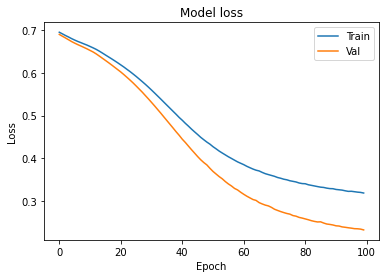

In [123]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

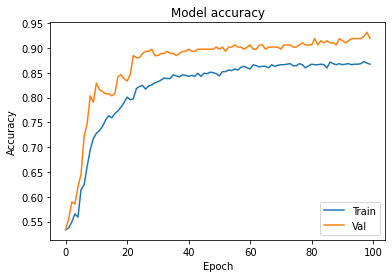

In [124]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()
# ket qua tot, ca hai train va validate accuracy tren 85%